# Social Media Ads classification 

## Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualize

In [6]:


# from pandas.plotting import scatter_matrix

# scatter_matrix(data,figsize=(20,15))



<Axes: xlabel='Insulin', ylabel='Count'>

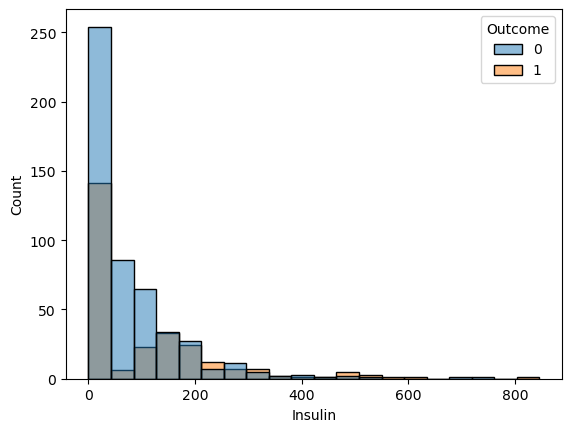

In [17]:
sns.histplot(data=data, x='Insulin', hue='Outcome' , bins=20)

## Correlation


In [8]:
corr_mat = data.corr()
corr_mat['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Train test split

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data, test_size = 0.3, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")


Rows in train set: 537
Rows in test set:231



## Model training

In [10]:
train_x = train_set.drop('Outcome',axis=1)
train_y = train_set['Outcome']

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(train_x,train_y)

/home/kkw/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model testing 

In [12]:
test_x = test_set.drop('Outcome',axis=1)
Actual_test_y = test_set['Outcome']

In [13]:
pred_test_y = log_reg.predict(test_x)

In [14]:
from sklearn.metrics import confusion_matrix
cf_mat= confusion_matrix(Actual_test_y,pred_test_y)
cf_mat

array([[121,  30],
       [ 30,  50]])

<Axes: >

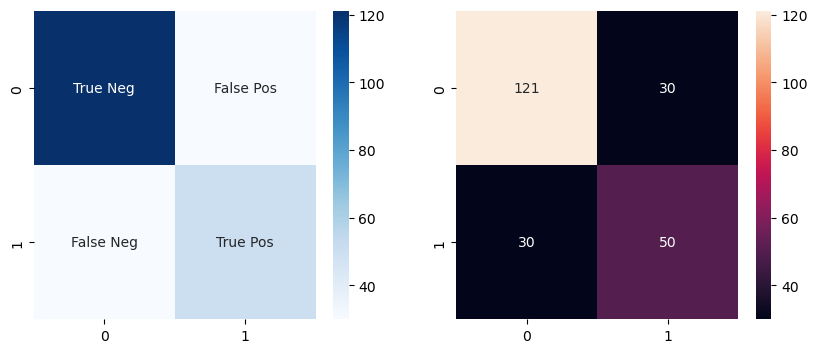

In [15]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat, annot=labels,fmt='', cmap='Blues',ax=axs[0])
sns.heatmap(cf_mat,annot=True, fmt='d', ax=axs[1])


In [19]:

from sklearn.metrics import (accuracy_score,recall_score,precision_score)
#Evaluation 

accuracy = accuracy_score(Actual_test_y,pred_test_y)
error_rate = 1-accuracy
precision = precision_score(Actual_test_y,pred_test_y)
recall = recall_score(Actual_test_y,pred_test_y)

In [20]:
print(f"Accuracy: {accuracy*100}")
print(f"Error rate: {error_rate*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")


Accuracy: 74.02597402597402
Error rate: 25.97402597402597
Precision: 62.5
Recall: 62.5
